<a href="https://colab.research.google.com/github/MariyaThorn/Diabetes-detection/blob/main/ML_Model_Deployment_on_EC2_and_Access_it.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Aupp/Fall 2025/Cloud ML and Data Engineering/ML Model Deployment on EC2 and Access it/diabetes_data.csv")
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.shape

(100000, 9)

In [ ]:
data.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [ ]:
data.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


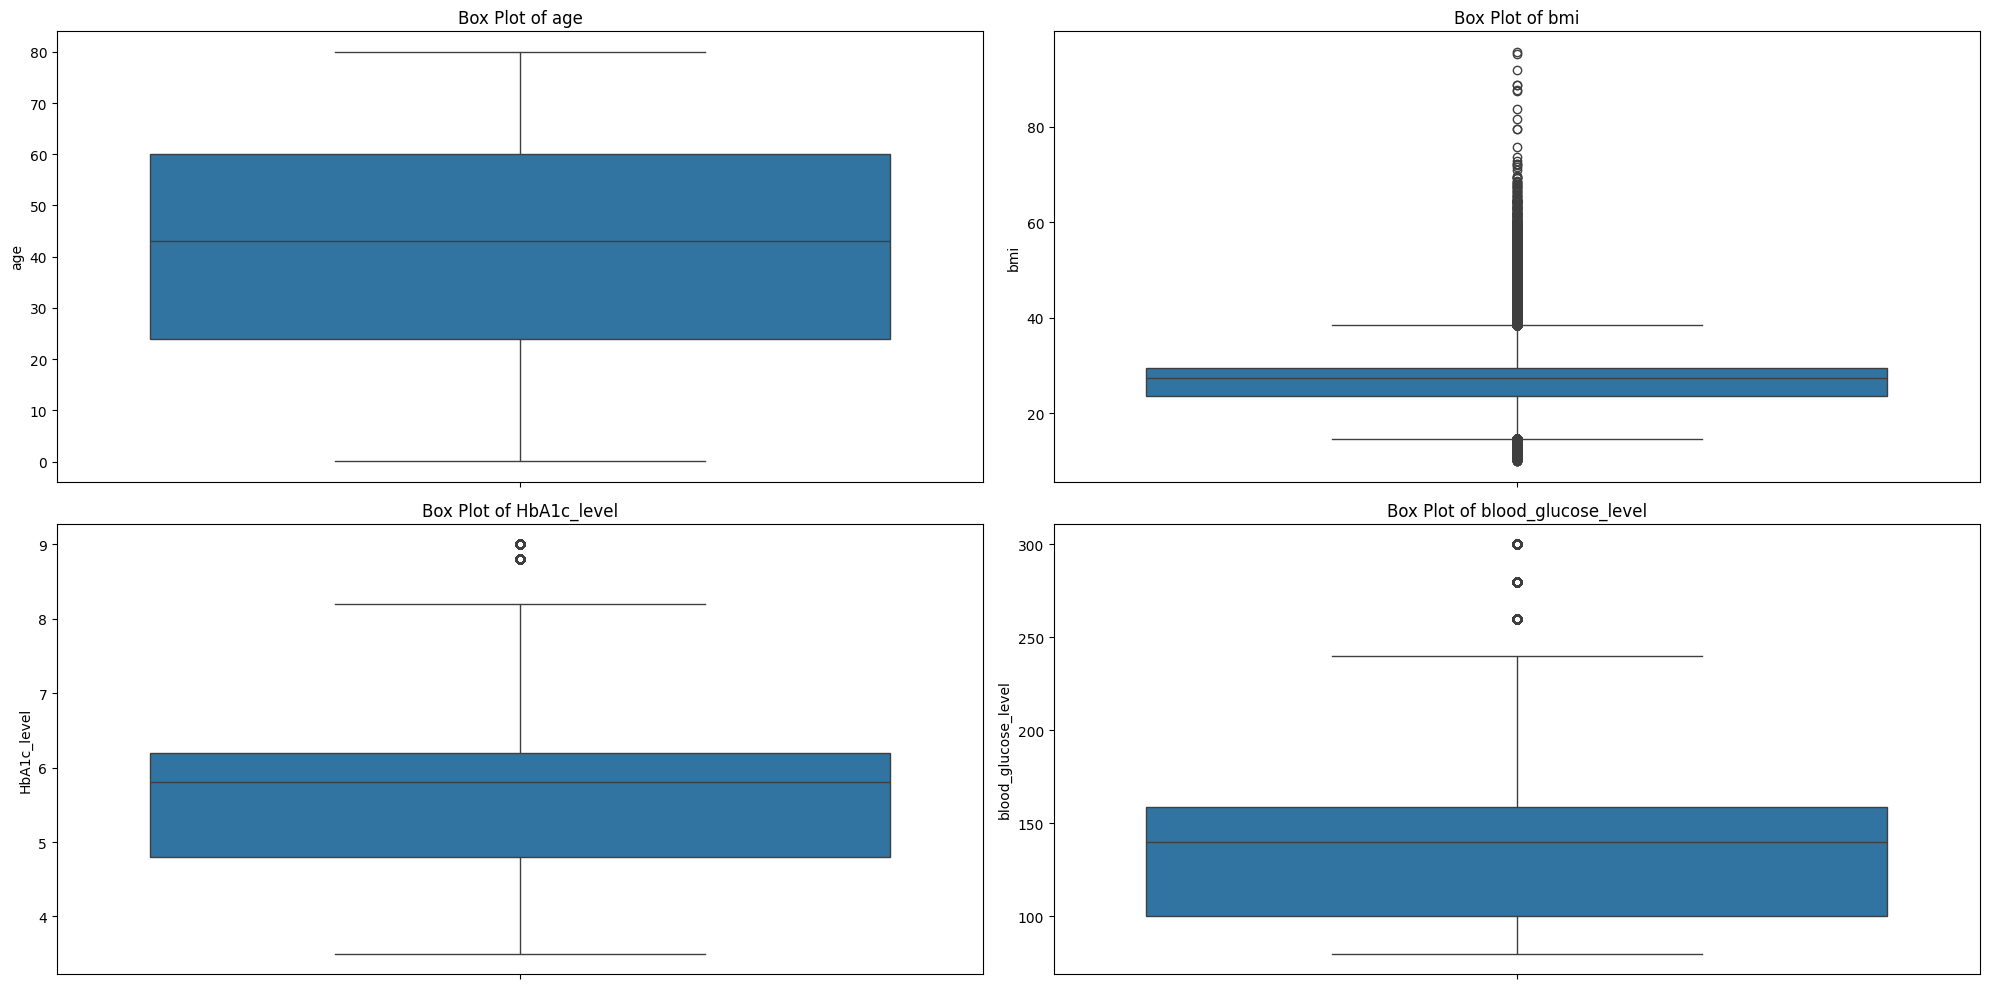

In [ ]:
# Select continuous columns
continuous_cols = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

# Create box plots for continuous columns
plt.figure(figsize=(20, 10))
for i, col in enumerate(continuous_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

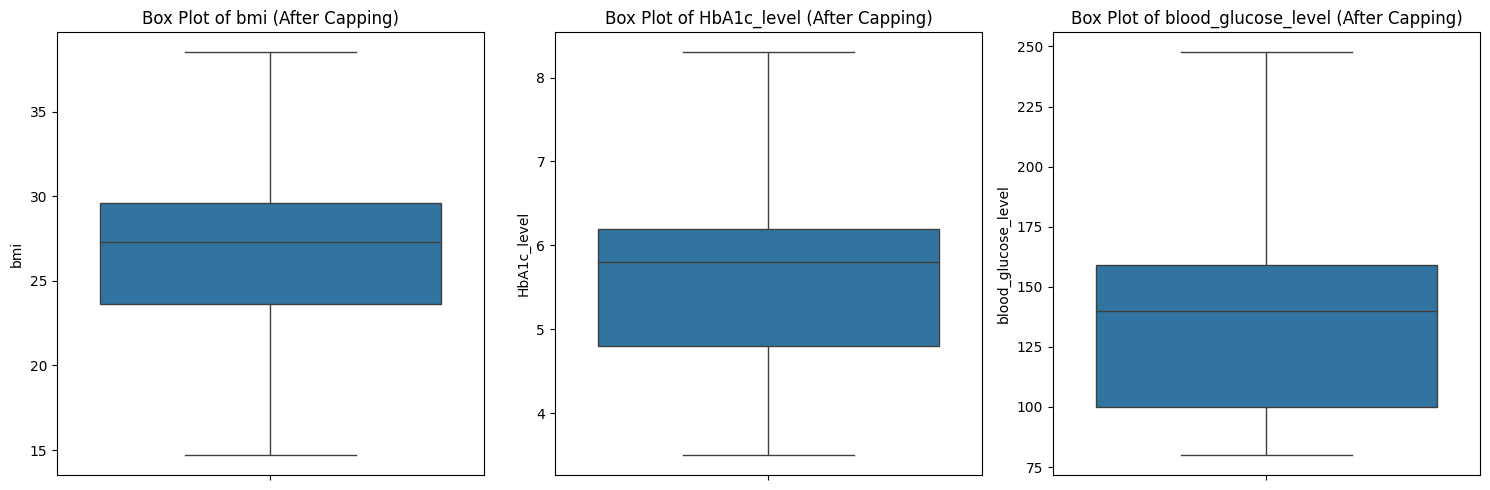

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

data = cap_outliers_iqr(data, 'bmi')
data = cap_outliers_iqr(data, 'HbA1c_level')
data = cap_outliers_iqr(data, 'blood_glucose_level')

# Re-generate box plots to visualize the effect of capping
plt.figure(figsize=(15, 5))
for i, col in enumerate(['bmi', 'HbA1c_level', 'blood_glucose_level']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Box Plot of {col} (After Capping)')
plt.tight_layout()
plt.show()

In [ ]:
print(data['blood_glucose_level'].skew())

print('SKEWED VALUE IS IN BETWEEN -0.5 to +0.5 -> SO FAIRLY SYMMETRICAL')

0.42275585044574565
SKEWED VALUE IS IN BETWEEN -0.5 to +0.5 -> SO FAIRLY SYMMETRICAL


In [ ]:
print(data['gender'].unique())

['Female' 'Male' 'Other']


In [ ]:
gender_mapper = {'Male':0, 'Female':1, 'Other':2}
data['Encode_Gender'] = data['gender'].replace(gender_mapper)
data['Encode_Gender'] = pd.to_numeric(data['Encode_Gender'])

/tmp/ipython-input-741020676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Encode_Gender'] = data['gender'].replace(gender_mapper)


In [ ]:
data['smoking_history'].value_counts()

,count
smoking_history,
No Info,35816
never,35095
former,9352
current,9286
not current,6447
ever,4004


In [ ]:
data = pd.get_dummies(data, columns=['smoking_history'])
data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Encode_Gender,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,Female,80.0,0,1,25.19,6.6,140.0,0,1,False,False,False,False,True,False
1,Female,54.0,0,0,27.32,6.6,80.0,0,1,True,False,False,False,False,False
2,Male,28.0,0,0,27.32,5.7,158.0,0,0,False,False,False,False,True,False
3,Female,36.0,0,0,23.45,5.0,155.0,0,1,False,True,False,False,False,False
4,Male,76.0,1,1,20.14,4.8,155.0,0,0,False,True,False,False,False,False


In [ ]:
data.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
bmi,float64
HbA1c_level,float64
blood_glucose_level,float64
diabetes,int64
Encode_Gender,int64
smoking_history_No Info,bool


In [ ]:
columns_to_drop = [
    'gender'
]
data.drop(columns=columns_to_drop, inplace=True)

VIEW CORRELATION MATRIX


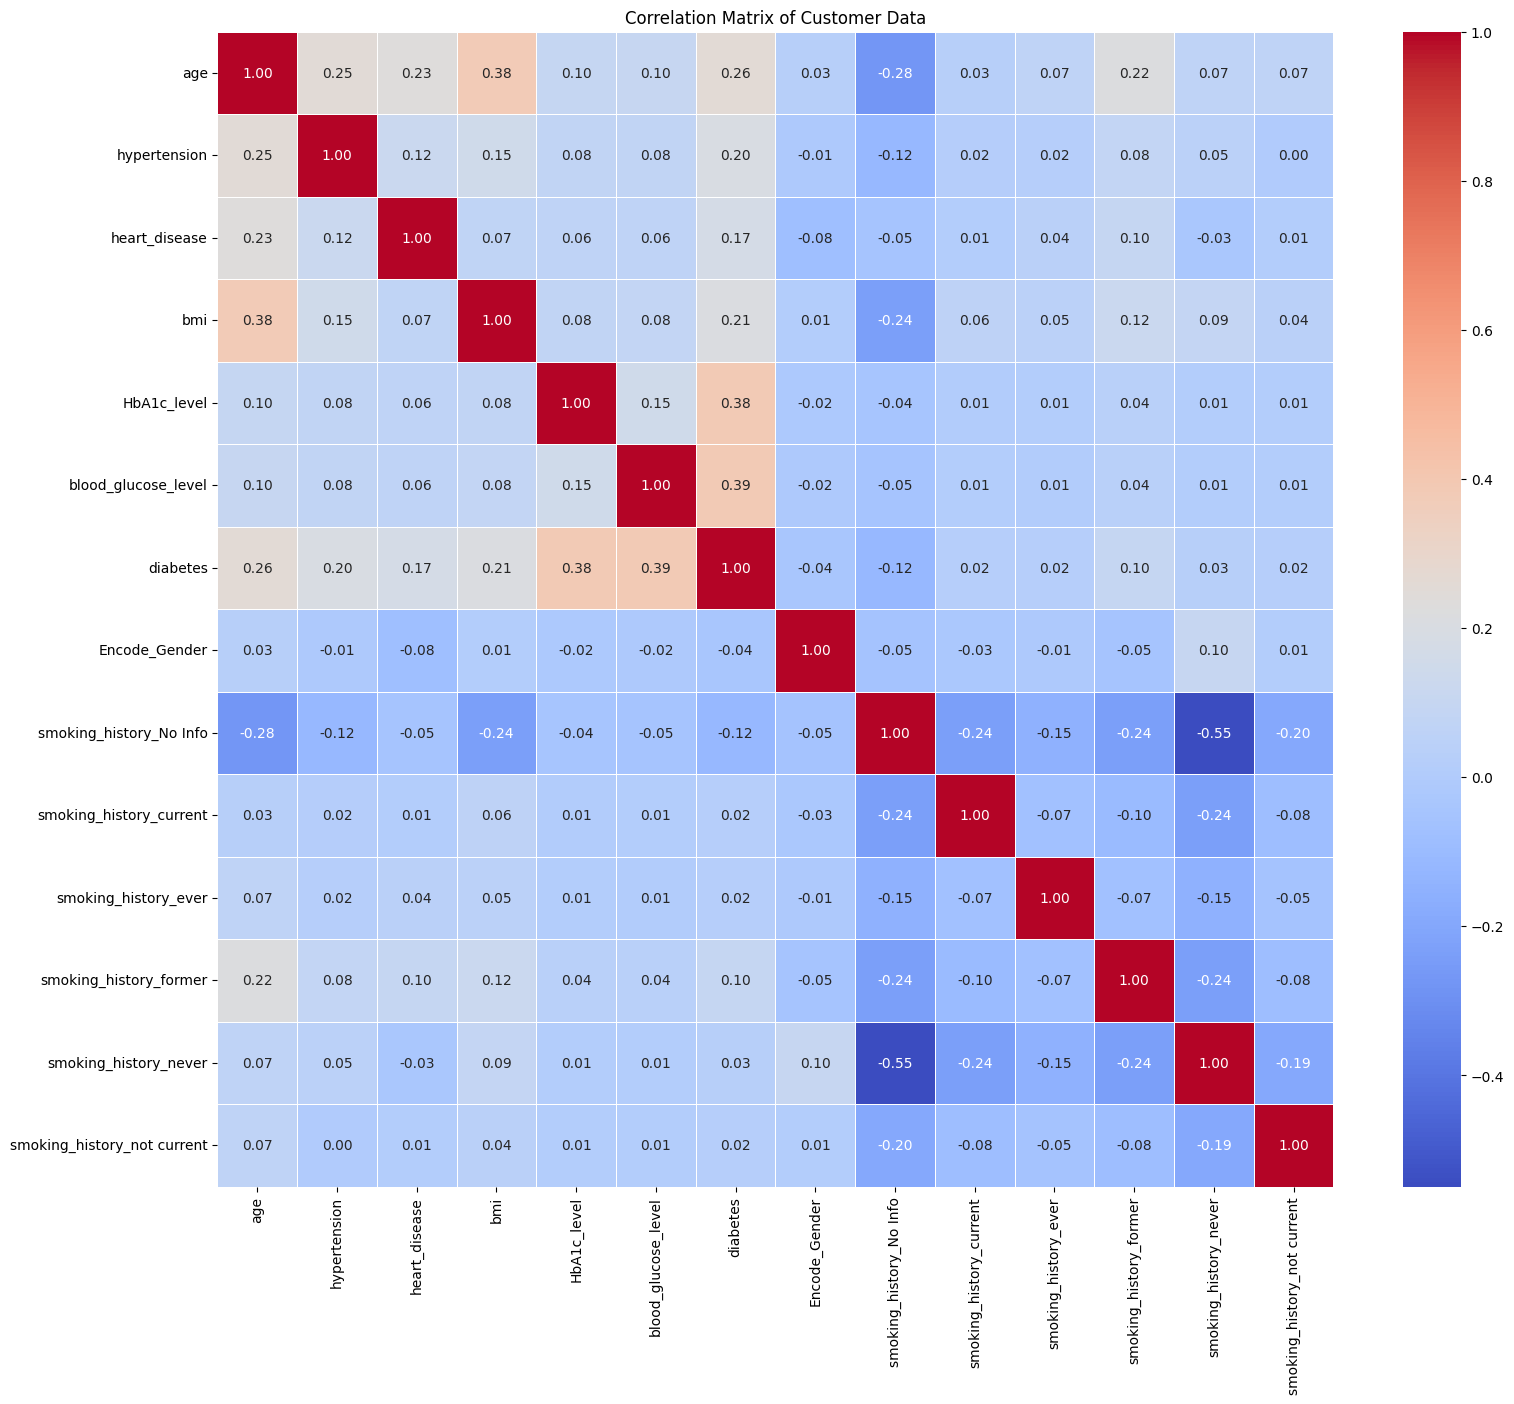

In [ ]:
print('VIEW CORRELATION MATRIX')
corel_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(18, 15))
sns.heatmap(corel_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Customer Data')
plt.show()

In [ ]:
correation_with_diabetes = data.corr()['diabetes'].sort_values(ascending=False)
print(correation_with_diabetes)

diabetes                       1.000000
blood_glucose_level            0.386446
HbA1c_level                    0.384753
age                            0.258008
bmi                            0.209656
hypertension                   0.197823
heart_disease                  0.171727
smoking_history_former         0.097917
smoking_history_never          0.027267
smoking_history_ever           0.024080
smoking_history_not current    0.020734
smoking_history_current        0.019606
Encode_Gender                 -0.037752
smoking_history_No Info       -0.118939
Name: diabetes, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Columns to standardize
columns_to_standardize = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

# Apply StandardScaler to the selected columns
data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

# Display the head of the DataFrame to show the standardized columns
display(data.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Encode_Gender,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.692704,0,1,-0.317679,1.031178,0.067835,0,1,False,False,False,False,True,False
1,0.538006,0,0,0.057889,1.031178,-1.490353,0,1,True,False,False,False,False,False
2,-0.616691,0,0,0.057889,0.172162,0.535292,0,0,False,False,False,False,True,False
3,-0.261399,0,0,-0.624482,-0.495962,0.457382,0,1,False,True,False,False,False,False
4,1.515058,1,1,-1.208112,-0.686854,0.457382,0,0,False,True,False,False,False,False


In [ ]:
# Split DataFrame into X (train features) and y (predict features)
X = data.iloc[:,[0,1,2,3,4,5,7,9,10,11,12,13]].values

y = data['diabetes'].values

In [ ]:
# Create train and test set
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20, random_state=42)

print('X TRAIN DATA ', X_train.shape)
print('Y TRAIN DATA ', y_train.shape)
print('X TEST DATA ', X_test.shape)
print('Y TEST DATA ', y_test.shape)

X TRAIN DATA  (80000, 12)
Y TRAIN DATA  (80000,)
X TEST DATA  (20000, 12)
Y TEST DATA  (20000,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained successfully.")

print("\nAll models trained.")


Training Random Forest...
Random Forest trained successfully.

Training Gradient Boosting...
Gradient Boosting trained successfully.

Training KNN...
KNN trained successfully.

All models trained.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    }

print("\n--- Model Performance Evaluation ---")
for name, metrics in results.items():
    print(f"\nModel: {name}")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


--- Model Performance Evaluation ---

Model: Random Forest
  Accuracy: 0.9689
  Precision: 0.9680
  Recall: 0.9689
  F1-Score: 0.9668

Model: Gradient Boosting
  Accuracy: 0.9724
  Precision: 0.9727
  Recall: 0.9724
  F1-Score: 0.9701

Model: KNN
  Accuracy: 0.9613
  Precision: 0.9595
  Recall: 0.9613
  F1-Score: 0.9580


In [ ]:
y_pred_test = trained_models['Gradient Boosting'].predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
df=pd.DataFrame()
df['Actual_diabetes'] = y_test
df['Predict_diabetes'] = y_pred_test
df.head(10)

,Actual_diabetes,Predict_diabetes
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


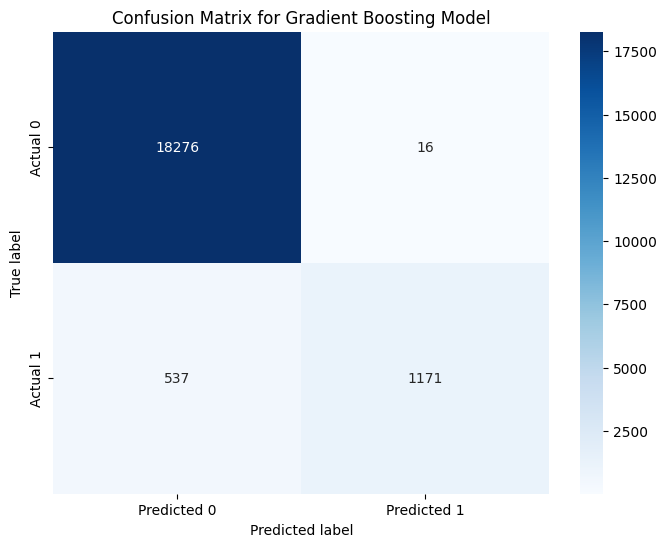

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()

In [ ]:
best_accuracy = -1
best_model_name = None

for name, metrics in results.items():
    if metrics['Accuracy'] > best_accuracy:
        best_accuracy = metrics['Accuracy']
        best_model_name = name

print(f"The best performing model is '{best_model_name}' with an accuracy of {best_accuracy:.4f}")

The best performing model is 'Gradient Boosting' with an accuracy of 0.9724


In [ ]:
import pickle

# Retrieve the best performing model object
best_model = trained_models[best_model_name]

# Define the filename for the pickle file
filename = 'best_diabetes_model.pkl'

# Save the best model to a pickle file
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model '{best_model_name}' has been saved to '{filename}'.")

The best model 'Gradient Boosting' has been saved to 'best_diabetes_model.pkl'.


In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

app = Flask(__name__)

# --- Load the trained model ---
try:
    with open('best_diabetes_model.pkl', 'rb') as file:
        best_model = pickle.load(file)
    print("Model 'best_diabetes_model.pkl' loaded successfully.")
except FileNotFoundError:
    print("Error: 'best_diabetes_model.pkl' not found. Ensure the model is saved in the correct path.")
    exit()
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# --- Re-create preprocessing components from original data ---
# This ensures preprocessing consistency with the training phase.
# We need to reload the original data to calculate capping bounds and fit scaler
# exactly as it was done during model training.

try:
    original_data = pd.read_csv("/content/drive/MyDrive/Aupp/Fall 2025/Cloud ML and Data Engineering/ML Model Deployment on EC2 and Access it/diabetes_data.csv")
except FileNotFoundError:
    print("Error: diabetes_data.csv not found. Please ensure the path is correct or the file is mounted.")
    exit()

# 1. Capping bounds calculation (from original data before any capping applied)
capping_bounds = {}
for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    Q1 = original_data[col].quantile(0.25)
    Q3 = original_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capping_bounds[col] = {'lower': lower_bound, 'upper': upper_bound}

# 2. Encode Gender and One-hot encode smoking_history for scaler fitting
gender_mapper = {'Male':0, 'Female':1, 'Other':2}
# Set the pandas option to opt-in to the future behavior for replace to avoid FutureWarning
pd.set_option('future.no_silent_downcasting', True)
original_data['Encode_Gender'] = original_data['gender'].replace(gender_mapper)
original_data['Encode_Gender'] = pd.to_numeric(original_data['Encode_Gender'])
original_data = pd.get_dummies(original_data, columns=['smoking_history'], dtype=bool)
original_data.drop(columns=['gender'], inplace=True)

# Apply capping to original_data (this is what happened during training prep)
for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
    lb = capping_bounds[col]['lower']
    ub = capping_bounds[col]['upper']
    original_data[col] = np.where(original_data[col] < lb, lb, original_data[col])
    original_data[col] = np.where(original_data[col] > ub, ub, original_data[col])

# 3. Fit the scaler on the preprocessed original_data
columns_to_standardize = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']
scaler = StandardScaler()
scaler.fit(original_data[columns_to_standardize])

# --- Define Prediction Function (similar to the one in the notebook but self-contained) ---
def predict_diabetes_api(age, gender, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level, smoking_history):
    user_data = pd.DataFrame({
        'age': [age],
        'hypertension': [hypertension],
        'heart_disease': [heart_disease],
        'bmi': [bmi],
        'HbA1c_level': [HbA1c_level],
        'blood_glucose_level': [blood_glucose_level]
    })

    for col in ['bmi', 'HbA1c_level', 'blood_glucose_level']:
        lb = capping_bounds[col]['lower']
        ub = capping_bounds[col]['upper']
        user_data[col] = np.where(user_data[col] < lb, lb, user_data[col])
        user_data[col] = np.where(user_data[col] > ub, ub, user_data[col])

    user_data[columns_to_standardize] = scaler.transform(user_data[columns_to_standardize])

    encoded_gender = gender_mapper.get(gender, 2)

    input_smoking_features = {
        'smoking_history_current': False,
        'smoking_history_ever': False,
        'smoking_history_former': False,
        'smoking_history_never': False,
        'smoking_history_not current': False
    }
    if smoking_history != 'No Info':
        col_name = f'smoking_history_{smoking_history}'
        if col_name in input_smoking_features:
            input_smoking_features[col_name] = True

    input_df_for_pred = pd.DataFrame({
        'age': user_data['age'][0],
        'hypertension': user_data['hypertension'][0],
        'heart_disease': user_data['heart_disease'][0],
        'bmi': user_data['bmi'][0],
        'HbA1c_level': user_data['HbA1c_level'][0],
        'blood_glucose_level': user_data['blood_glucose_level'][0],
        'Encode_Gender': encoded_gender
    }, index=[0])

    input_df_for_pred = pd.concat([
        input_df_for_pred,
        pd.DataFrame([input_smoking_features])
    ], axis=1)

    final_features_order = [
        'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level',
        'Encode_Gender',
        'smoking_history_current', 'smoking_history_ever', 'smoking_history_former',
        'smoking_history_never', 'smoking_history_not current'
    ]
    input_array = input_df_for_pred[final_features_order].values

    prediction = best_model.predict(input_array)
    prediction_proba = best_model.predict_proba(input_array)

    return prediction[0], prediction_proba[0]

# --- API Endpoint ---
@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json(force=True)

        # Extract features from the request data
        age = data['age']
        gender = data['gender'] # 'Male', 'Female', 'Other'
        hypertension = data['hypertension']
        heart_disease = data['heart_disease']
        bmi = data['bmi']
        hba1c_level = data['HbA1c_level']
        blood_glucose_level = data['blood_glucose_level']
        smoking_history = data['smoking_history'] # 'No Info', 'never', 'former', 'current', 'not current', 'ever'

        # Get prediction and probabilities
        predicted_class, probabilities = predict_diabetes_api(
            age, gender, hypertension, heart_disease, bmi,
            hba1c_level, blood_glucose_level, smoking_history
        )

        result = {
            'prediction': int(predicted_class),
            'probability_no_diabetes': float(probabilities[0]),
            'probability_diabetes': float(probabilities[1]),
            'risk_level': 'HIGH RISK OF DIABETES' if predicted_class == 1 else 'LOW RISK OF DIABETES'
        }

        return jsonify(result)

    except KeyError as e:
        return jsonify({'error': f'Missing data field: {e}'}), 400
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# To run the Flask app locally, uncomment the line below:
# if __name__ == '__main__':
#     app.run(debug=True, host='0.0.0.0', port=5000)


Model 'best_diabetes_model.pkl' loaded successfully.
